In [1]:
import pandas as pd
import numpy as np

In [4]:
df= pd.read_csv("/content/placement.csv")

In [5]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [7]:
df = df.iloc[:,1:]

In [8]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [10]:
import matplotlib.pyplot as plt

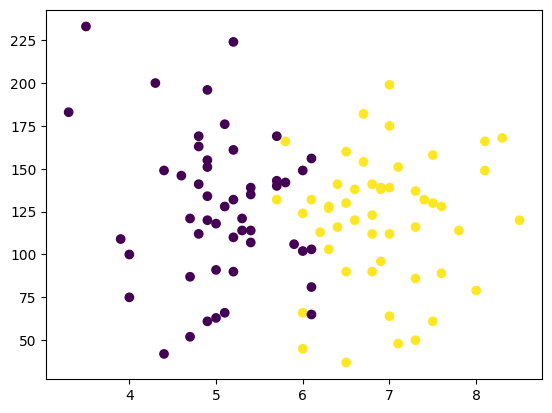

In [12]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [13]:
x=df.iloc[:,:2]
y=df.iloc[:,-1]

In [14]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.1)

In [17]:
x_train

,cgpa,iq
4,5.8,142.0
27,6.0,124.0
2,5.3,121.0
39,4.6,146.0
80,4.9,196.0
...,...,...
61,7.3,137.0
44,7.5,61.0
86,5.1,128.0
95,4.3,200.0


from matplotlib import pyplot as plt
x_train['cgpa'].plot(kind='hist', bins=20, title='cgpa')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x_train['iq'].plot(kind='hist', bins=20, title='iq')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x_train.plot(kind='scatter', x='cgpa', y='iq', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x_train['cgpa'].plot(kind='line', figsize=(8, 4), title='cgpa')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
x_train['iq'].plot(kind='line', figsize=(8, 4), title='iq')
plt.gca().spines[['top', 'right']].set_visible(False)

In [18]:
x_test

,cgpa,iq
5,7.1,48.0
66,6.9,96.0
33,6.0,149.0
18,4.0,100.0
13,6.4,116.0
34,4.8,163.0
72,7.3,116.0
35,6.8,90.0
65,8.1,166.0
0,6.8,123.0


In [19]:
y_test

,placement
5,1
66,1
33,0
18,0
13,1
34,0
72,1
35,1
65,1
0,1


In [40]:
from sklearn.preprocessing import StandardScaler

In [49]:
scalar = StandardScaler()

In [50]:
x_train = scalar.fit_transform(x_train)

In [51]:
x_train

array([[-0.12724288,  0.43890525],
       [ 0.05030533, -0.00856266],
       [-0.57111341, -0.08314064],
       [-1.19253214,  0.53834256],
       [-0.92620983,  1.78130896],
       [ 0.31662764,  0.06601533],
       [-1.01498393,  0.41404592],
       [ 0.84927227,  0.33946794],
       [-0.65988751, -0.85377981],
       [ 0.05030533, -1.97244957],
       [ 1.3819169 ,  0.8366545 ],
       [ 1.20436869, -1.84815293],
       [ 1.470691  ,  0.09087465],
       [-1.10375804, -0.92835779],
       [ 0.67172406,  1.43327837],
       [-1.37008035, -2.04702756],
       [-0.57111341, -0.25715594],
       [-0.83743572, -1.52498167],
       [-0.92620983,  0.6626392 ],
       [-0.92620983,  0.24003062],
       [ 0.49417585,  0.14059331],
       [ 0.93804637,  1.85588695],
       [ 0.76049816,  0.41404592],
       [ 2.26965794, -0.10799997],
       [ 0.13907943,  0.78693584],
       [-0.21601699,  0.46376458],
       [-0.4823393 , -0.43117123],
       [ 1.82578742, -1.12723242],
       [-0.65988751,

In [52]:
x_test = scalar.transform(x_test)


In [53]:
x_test

array([[ 0.59105859, -2.00009535],
       [ 0.41721783, -0.60264882],
       [-0.3650656 ,  0.94036506],
       [-2.10347322, -0.48619494],
       [-0.01738408, -0.02037943],
       [-1.40811017,  1.34795364],
       [ 0.76489935, -0.02037943],
       [ 0.33029745, -0.77732963],
       [ 1.4602624 ,  1.43529404],
       [ 0.33029745,  0.18341486]])

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
clf = LogisticRegression()

In [58]:
clf.fit(x_train,y_train)

LogisticRegression()

In [67]:
y_predict = clf.predict(x_test)

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
accuracy_score(y_test,y_predict)

0.9

In [71]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

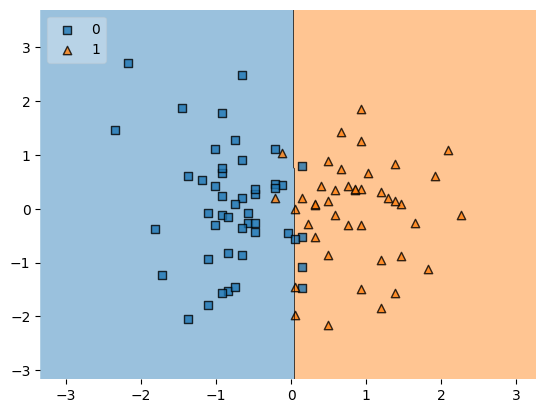

In [72]:
plot_decision_regions(x_train,y_train.values, clf=clf, legend=2)

In [73]:
import pickle

In [75]:
pickle.dump(clf,open('model.pkl','wb'))